In [23]:
import numpy as np
import sympy as sp
import matplotlib
import random
import matplotlib.pyplot as plt
%matplotlib inline 
%precision 5

u'%.5f'

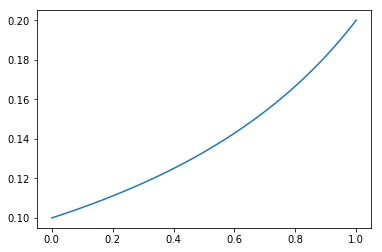

In [42]:
## Refer to the problem defined in class

# For this problem I know the analytical solution
def u_exact(x):
    u0 = 1e-3
    return (1./3)*u0*((x-2)**2-1)

def A(x):
    A0 = 0.1
    return -2*A0/(x-2)

x_ls = np.linspace(0,1,100)
#plt.plot(x_ls,u_exact(x_ls))
plt.plot(x_ls,A(x_ls))

In [13]:
# Some of the parameters (defined in the class notes)

u0 = 1e-3
A0 = 0.1
E = 30e6
P = (4./3)*u0*A0*E
print(P)

4000.0


In [24]:
## Finite element solution

# pre processing 
n_ele = 5
n_node = 6
node_X = np.array([1.,0.8,0.6,0.4,0.2,0.])
elements = np.array([[6,5],[5,4],[4,3],[3,2],[2,1]])
A_element = np.array([(A(0.)+A(0.2))/2,(A(0.2)+A(0.4))/2,(A(0.4)+A(0.6))/2,(A(0.6)+A(0.8))/2,(A(0.8)+A(1.))/2])
print(A_element)

# assemble global stiffness 
K = np.zeros((n_node,n_node))

# Loop over elements 
for i in range(n_ele):
    
    # Beginning and end 'x' coordinates of this element 
    x1e = node_X[elements[i,0]-1]
    x2e = node_X[elements[i,1]-1]
    le = x2e-x1e 
    
    # stiffness matrix for this element (already derived)
    Ke = (A_element[i]*E/le)*np.array([[1.,-1],[-1.,1]])
    
    # Assemble into global stiffness 
    K[elements[i,0]-1,elements[i,0]-1] += Ke[0,0]
    K[elements[i,0]-1,elements[i,1]-1] += Ke[0,1]
    K[elements[i,1]-1,elements[i,0]-1] += Ke[1,0]
    K[elements[i,1]-1,elements[i,1]-1] += Ke[1,1]

print(K)

[ 0.10556  0.11806  0.13393  0.15476  0.18333]
[[ 27500000.      -27500000.              0.              0.              0.
          0.     ]
 [-27500000.       50714285.71429 -23214285.71429         0.              0.
          0.     ]
 [        0.      -23214285.71429  43303571.42857 -20089285.71429
          0.              0.     ]
 [        0.              0.      -20089285.71429  37797619.04762
  -17708333.33333         0.     ]
 [        0.              0.              0.      -17708333.33333
   33541666.66667 -15833333.33333]
 [        0.              0.              0.              0.
  -15833333.33333  15833333.33333]]


In [43]:
# solve

# solving the system with matrix partitioning 
n_E = 1 # the first node has an essential boundary condition
n_F = 5 # the other 5 nodes are free
K_E = K[0:n_E,0:n_E]
K_F = K[n_E:,n_E:]
K_EF = K[0:n_E,n_E:]
# known displacement
u_E = np.array([0.])
# known external forces
F_F = np.array([0.,0.,0.,0.,4000])
# solving A\b
u_F = np.linalg.solve(K_F,F_F- np.dot(K_EF.transpose(),u_E))
#print(u_F)
# Assemble the vector with all degrees of fredom [u_E,u_F]
u = np.zeros((n_node))
u[0:n_E] = u_E
u[n_E:] = u_F
print(u)

[ 0.       0.00015  0.00032  0.00052  0.00074  0.001  ]


In [26]:
# plot the interpolation
## Define shape function
def N1(x,x1e,x2e):
    le = x2e-x1e
    return (1./le)*(x2e-x)

def N2(x,x1e,x2e):
    le = x2e-x1e
    return (1./le)*(x-x1e)

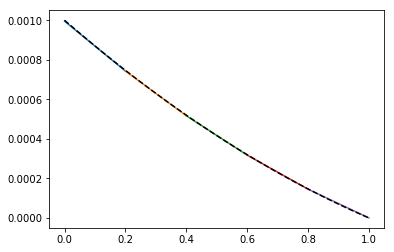

In [44]:
# Loop over elements 
for i in range(n_ele):
    
    # Beginning and end 'x' coordinates of this element 
    x1e = node_X[elements[i,0]-1]
    x2e = node_X[elements[i,1]-1]
    
    # Nodal values of the function 'u'
    u1e = d[elements[i,0]-1]
    u2e = d[elements[i,1]-1]
    
    # Eval the shape function evaluation for multiple x
    x_vec = np.linspace(x1e,x2e,50)
    u_vec = N1(x_vec,x1e,x2e)*u1e + N2(x_vec,x1e,x2e)*u2e
    
    # plot
    plt.plot(x_vec,u_vec,zorder=0)

plt.plot(x_ls,u_exact(x_ls),'--',zorder=1,color='black')